In [1]:
#importing necessary libraries and frameworks
import tensorflow as tf
import torch
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from keras.datasets import cifar10
import seaborn as sns

import keras
from tensorflow.keras import layers
from keras.utils import to_categorical


2024-02-24 11:40:43.425738: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 11:40:43.425863: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 11:40:43.559470: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

170498071/170498071 [==============================] - 16s 0us/step
X train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
X test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


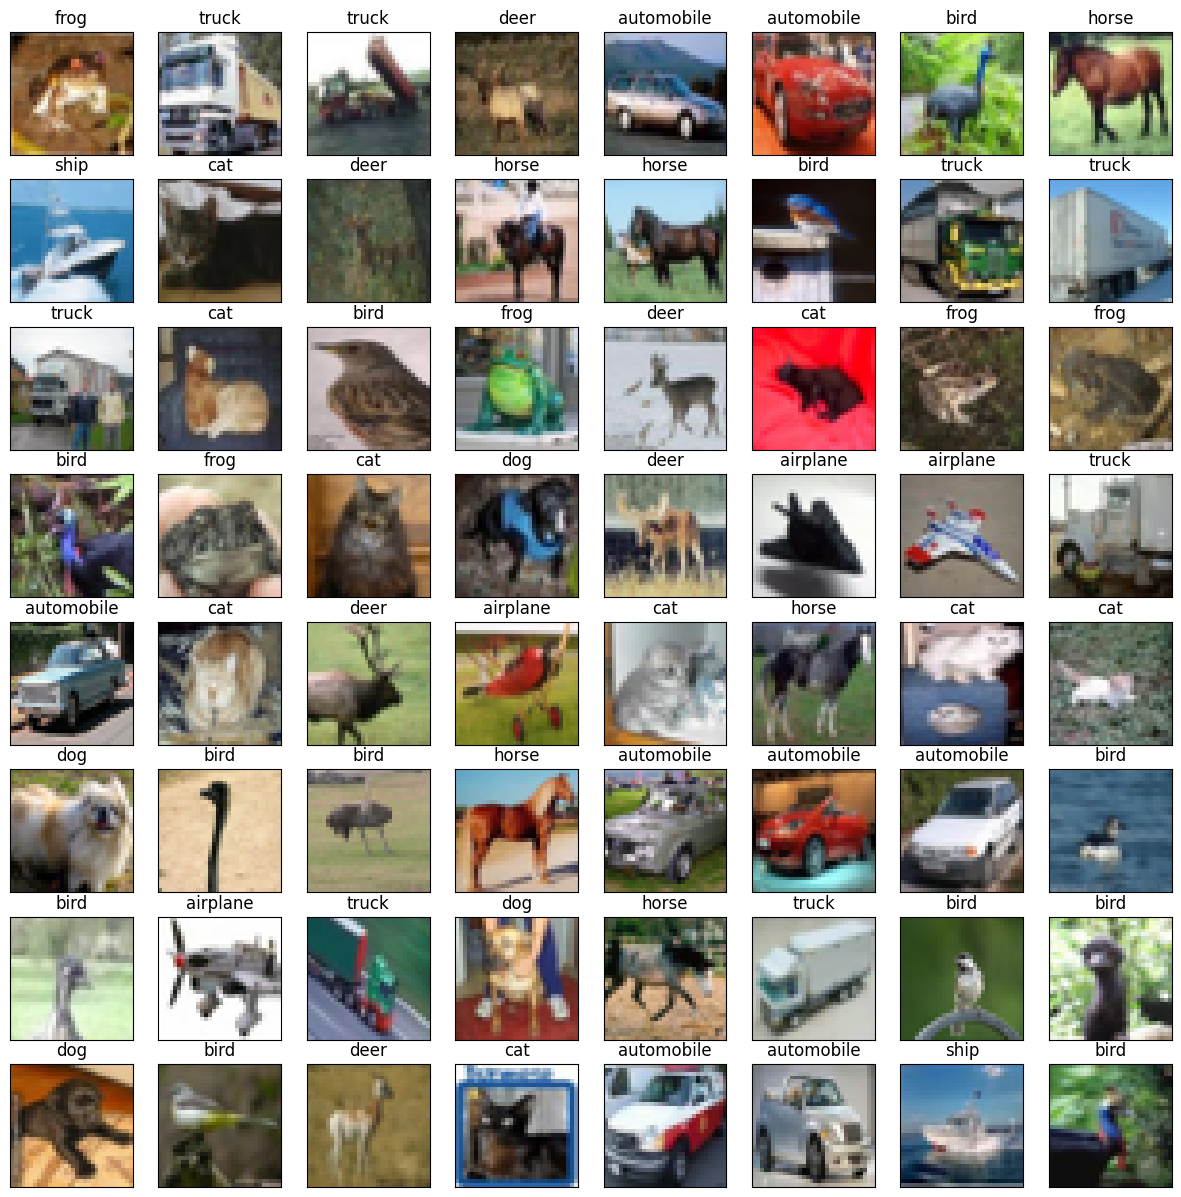

In [3]:
# displaying the sample image from each class:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# create a new figure
plt.figure(figsize=(15,15))

#displaying 64 images 
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

# Data Preprocessing

### Flattening, and Normalising the Images

3072 = 32 * 32 * 3

In [4]:
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

### One-hot encoding the labels for training and testing

In [7]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

print(f"Shape before one-hot encoding: {y_train.shape}; e.g. {y_train[0]}")
print(f"Shape after one-hot encoding: {Y_train.shape}; e.g. {Y_train[0]}")

Shape before one-hot encoding: (50000, 1); e.g. [6]
Shape after one-hot encoding: (50000, 10); e.g. [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Model Creation using pytorch

In [8]:
import torch

class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init()
        self.fc1 = torch.nn.Linear(3072, 1024)
        self.relu1 = torch.nn.LeakyReLU(0.1)
        
        self.fc2 = torch.nn.Linear(1024, 512)
        self.relu2 = torch.nn.LeakyReLU(0.1)
        
        self.fc3 = torch.nn.Linear(512, 256)
        self.relu3 = torch.nn.LeakyReLU(0.1)
        
        self.fc4 = torch.nn.Linear(256, 175)
        self.relu4 = torch.nn.LeakyReLU(0.1)
        
        self.fc5 = torch.nn.Linear(175, 64)
        self.relu5 = torch.nn.LeakyReLU(0.1)
        
        self.fc6 = torch.nn.Linear(64, 10)
        #self.softmax = torch.nn.Softmax(dim=1)
        
    def forward(self,x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.relu5(x)
        x = self.fc6(x)
        return x

# Model Creationg using Tensorflow

In [9]:
from keras.layers import LeakyReLU
model = keras.Sequential([
    layers.Dense(1024, activation=keras.layers.LeakyReLU(alpha=0.1), input_shape=(3072,)),
    layers.Dense(512, activation=keras.layers.LeakyReLU(alpha=0.1)),
    #layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(175, activation=keras.layers.LeakyReLU(alpha=0.1)),
    #layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 175)               89775     
                                                                 
 dense_3 (Dense)             (None, 10)                1760      
                                                                 
Total params: 3763087 (14.36 MB)
Trainable params: 3763087 (14.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


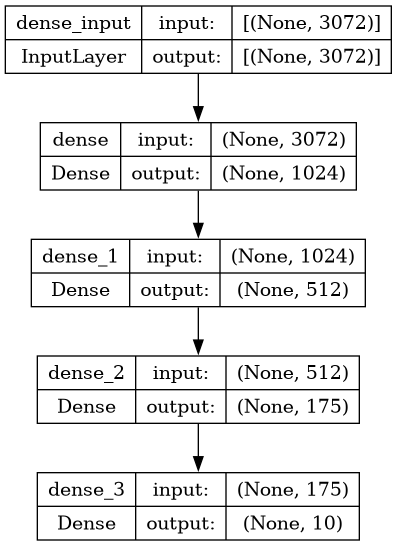

In [10]:
keras.utils.plot_model(model, show_shapes=True)

In [11]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=30)

Epoch 1/30
500/500 [==============================] - 11s 21ms/step - loss: 1.9314 - accuracy: 0.3080
Epoch 2/30
500/500 [==============================] - 10s 20ms/step - loss: 1.7476 - accuracy: 0.3833
Epoch 3/30
500/500 [==============================] - 10s 21ms/step - loss: 1.6724 - accuracy: 0.4087
Epoch 4/30
500/500 [==============================] - 10s 20ms/step - loss: 1.6173 - accuracy: 0.4289
Epoch 5/30
500/500 [==============================] - 10s 20ms/step - loss: 1.5789 - accuracy: 0.4432
Epoch 6/30
500/500 [==============================] - 11s 21ms/step - loss: 1.5468 - accuracy: 0.4551
Epoch 7/30
500/500 [==============================] - 10s 20ms/step - loss: 1.5170 - accuracy: 0.4666
Epoch 8/30
500/500 [==============================] - 10s 20ms/step - loss: 1.4923 - accuracy: 0.4755
Epoch 9/30
500/500 [==============================] - 11s 21ms/step - loss: 1.4653 - accuracy: 0.4850
Epoch 10/30
500/500 [==============================] - 10s 20ms/step - loss: 1.443

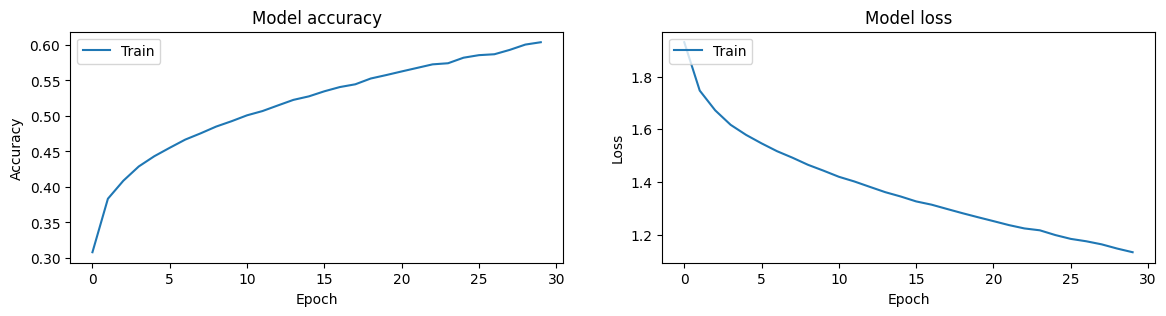

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14,3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.show()

In [14]:
test_loss_digit, test_acc_digit = model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.3393 - accuracy: 0.5241


In [15]:
print("Testing Accuracy : ", round(test_acc_digit,4)*100, "%")

Testing Accuracy :  52.410000000000004 %


In [16]:
from keras.layers import LeakyReLU
model = keras.Sequential([
    layers.Dense(2048, activation=keras.layers.LeakyReLU(alpha=0.1), input_shape=(3072,)),
    layers.Dense(1024, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(512, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(175, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.1)),
    layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2048)              6293504   
                                                                 
 dense_5 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 175)               44975     
                                                                 
 dense_9 (Dense)             (None, 64)                11264     
                                                                 
 dense_10 (Dense)            (None, 10)               

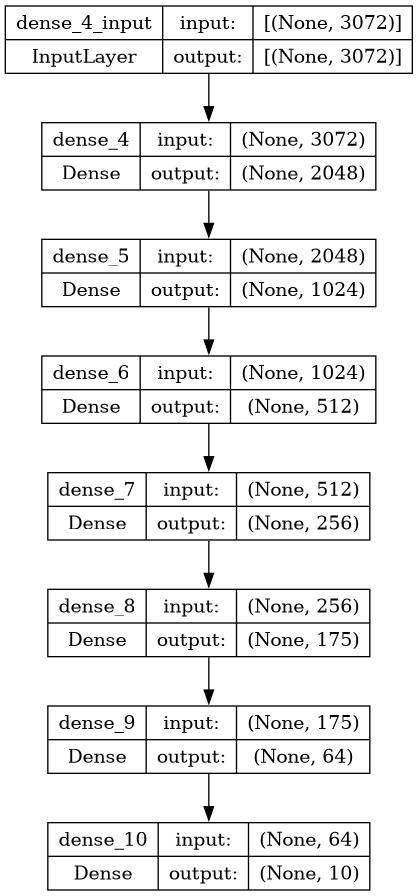

In [17]:
keras.utils.plot_model(model, show_shapes=True)

In [18]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [19]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=30)

Epoch 1/30
500/500 [==============================] - 28s 55ms/step - loss: 2.0032 - accuracy: 0.2774
Epoch 2/30
500/500 [==============================] - 28s 56ms/step - loss: 1.7879 - accuracy: 0.3633
Epoch 3/30
500/500 [==============================] - 28s 56ms/step - loss: 1.6964 - accuracy: 0.3979
Epoch 4/30
500/500 [==============================] - 28s 56ms/step - loss: 1.6263 - accuracy: 0.4213
Epoch 5/30
500/500 [==============================] - 28s 57ms/step - loss: 1.5739 - accuracy: 0.4402
Epoch 6/30
500/500 [==============================] - 28s 56ms/step - loss: 1.5291 - accuracy: 0.4602
Epoch 7/30
500/500 [==============================] - 28s 56ms/step - loss: 1.4965 - accuracy: 0.4687
Epoch 8/30
500/500 [==============================] - 28s 57ms/step - loss: 1.4584 - accuracy: 0.4824
Epoch 9/30
500/500 [==============================] - 28s 55ms/step - loss: 1.4247 - accuracy: 0.4945
Epoch 10/30
500/500 [==============================] - 28s 56ms/step - loss: 1.396

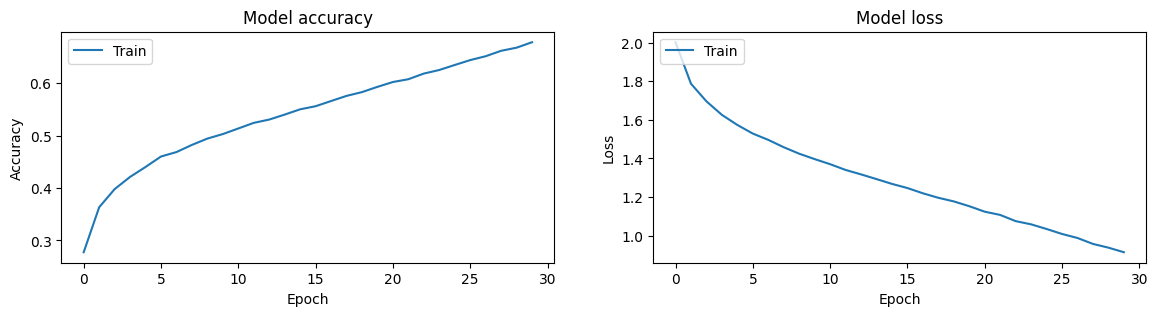

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14,3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.show()

In [21]:
test_loss_digit, test_acc_digit = model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.4430 - accuracy: 0.5228
